In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image

In [2]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

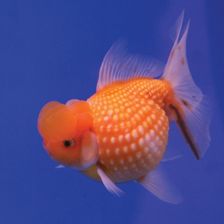

In [4]:
gold_fish = Image.open("/content/drive/MyDrive/sample_image/goldfish.png").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish) / 255.0 # convert image to numpy array + scale to 0 and 1
gold_fish, gold_fish.shape

(array([[[0.18039216, 0.27843137, 0.61176471],
         [0.17254902, 0.27058824, 0.61176471],
         [0.17254902, 0.27058824, 0.60784314],
         ...,
         [0.16078431, 0.21568627, 0.54509804],
         [0.16078431, 0.21568627, 0.54509804],
         [0.16862745, 0.21960784, 0.5372549 ]],
 
        [[0.17647059, 0.27058824, 0.61176471],
         [0.16862745, 0.26666667, 0.60392157],
         [0.16862745, 0.26666667, 0.6       ],
         ...,
         [0.16078431, 0.21568627, 0.54117647],
         [0.16078431, 0.21568627, 0.54117647],
         [0.16470588, 0.21568627, 0.54509804]],
 
        [[0.17647059, 0.2745098 , 0.61176471],
         [0.17647059, 0.2745098 , 0.60784314],
         [0.16862745, 0.27058824, 0.60784314],
         ...,
         [0.16862745, 0.21568627, 0.54901961],
         [0.16470588, 0.21176471, 0.55294118],
         [0.16470588, 0.21176471, 0.55686275]],
 
        ...,
 
        [[0.18431373, 0.2745098 , 0.61176471],
         [0.19215686, 0.2745098 , 0.61176

In [6]:
classifier.predict(gold_fish)

ValueError: ignored

In [7]:
"""
Above error explanation ->
Expected input shape for CNN image classification models:

- `batch_size`: The number of images processed together in a single batch.
- `224`: The image height and width, typically set to 224 pixels.
- `3`: The number of color channels (e.g., Red, Green, Blue) for each image.

So, the expected shape is (batch_size, 224, 224, 3).

Example:
For processing a batch of 32 images, the input shape would be (32, 224, 224, 3).
"""
# so adding one more dimension
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 1s 785ms/step


array([[ 0.18017107,  1.5536982 , 10.646049  , ..., -2.2405877 ,
         0.79922456,  1.2731375 ]], dtype=float32)

In [9]:
np.argmax(result)

2

In [10]:
# download the text file from th url
import requests

url = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
response = requests.get(url)

if response.status_code == 200:
    with open("ImageNetLabels.txt", "wb") as f:
        f.write(response.content)
else:
    print("Failed to download the file.")

In [11]:
# reading the text file and adding it to image_labels array
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[np.argmax(result)]

'goldfish'

In [13]:
# load flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir - where to download data. '.' means current directory
# untar true - unzip it

In [14]:
data_dir

'./datasets/flower_photos'

In [15]:
import os

# Define the directory path where your image files are located
directory_path = "/content/datasets/flower_photos/"  # Replace with your desired directory path

# Initialize a counter for image files
image_count = 0

# Use os.walk() to traverse through all subdirectories and count image files
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith('.jpg'):
            image_count += 1

print(image_count)

3670


In [16]:
# Define the directory path where your image files are located
directory_path = "/content/datasets/flower_photos/daisy"  # Replace with your desired directory path

# Use os.listdir() to list all files in the directory
all_files = os.listdir(directory_path)

# Use a list comprehension to filter files with a .jpg extension
image_files_daisy = [f for f in all_files if f.endswith('.jpg')]

# Count the number of image files
image_count_daisy = len(image_files_daisy)
image_count_daisy,
image_files_daisy[:5]

['721595842_bacd80a6ac.jpg',
 '2479956481_8d1a9699be_n.jpg',
 '4258408909_b7cc92741c_m.jpg',
 '4724713781_d169f98a35.jpg',
 '4610018126_21f438d2dc_m.jpg']

In [17]:
image_files_daisy[0]

'721595842_bacd80a6ac.jpg'

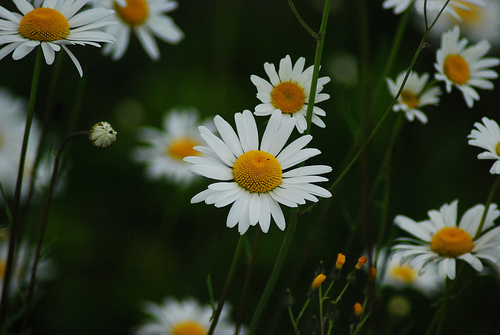

In [18]:
directory_path = "/content/datasets/flower_photos/daisy/"

file_name = image_files_daisy[0]
file_path = directory_path + file_name

Image.open(file_path)

In [19]:
# define a function to get the list of images according to flower file name
def getListOfImages(file_name):
  directory_path = "/content/datasets/flower_photos/"
  file_path = directory_path + file_name
  all_files = os.listdir(file_path)
  image_files = [f for f in all_files if f.endswith('.jpg')]
  return image_files

In [20]:
# dictionary to save list of images
flowers_images_dict = {
    'roses': getListOfImages("roses"),
    'daisy': getListOfImages("daisy"),
    'dandelion': getListOfImages("dandelion"),
    'sunflowers': getListOfImages("sunflowers"),
    'tulips': getListOfImages("tulips")
}

In [21]:
flowers_images_dict['roses'][0]

'326541992_d542103ca8_n.jpg'

In [22]:
# dictionary to save labels of images
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
import cv2

# define a function to get the path of image
def path(flower_name, flower_index):
  directory_path = "/content/datasets/flower_photos/"
  file_name = flowers_images_dict[flower_name][flower_index]
  file_path = directory_path + flower_name + "/" + file_name
  return file_path

img = cv2.imread(path("roses", 0))
img.shape

(240, 320, 3)

In [24]:
img = cv2.imread(path("daisy", 3))
img.shape

(333, 500, 3)

In [25]:
# resize images to (224, 224, 3) and append to new X (input images) and y (labels)
X, y = [], []

for flower_name, image_files_list in flowers_images_dict.items():
    for image_file in image_files_list:
        img = cv2.imread(path(flower_name, image_files_list.index(image_file)))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
X[0].shape

(224, 224, 3)

In [27]:
# turn these into numpy arrays
X = np.array(X)
y = np.array(y)

In [28]:
# train, test splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
# scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

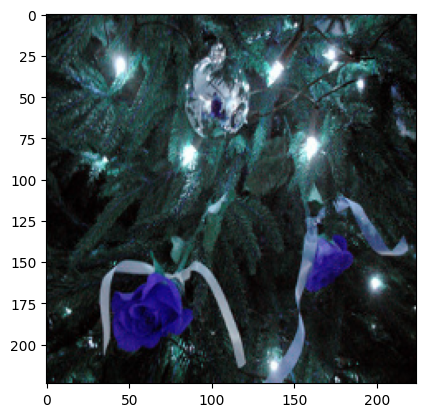

In [30]:
plt.imshow(X[0])

In [31]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 984ms/step


array([795, 795, 801])

In [32]:
image_labels[795]

'shower curtain'

In [33]:
image_labels[795]

'shower curtain'

In [34]:
image_labels[801]

'slot'

In [35]:
# take pre-trained model and retrain it using flower dataset
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model,
                                                    input_shape=(224, 224, 3),
                                                    trainable=False)  # trainable=False means freeze - won't train

In [ ]:
# retrain
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

tf.keras.backend.clear_session()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

history_of_model = model.fit(X_train,
                             y_train,
                             epochs=5)

In [ ]:
     model.summary()